# 主題:用 CNN 做圖形辨識
Yann LeCun 被譽為 Deep Learning 的三巨頭之一。他的 CNN (Convolutional Neural Networks) 是讓 Neural Network 重新受到重視的主因之一。

## 1. 初始準備
基本上和之前是一樣的, 我們就不再說明。

In [3]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 2. 讀入 MNIST 數據庫

## 2.1 由 Keras 讀入 MNIST

基本上和我們上次一樣, 這次因為 Keras 已偷偷把數據庫存在你的電腦, 所以會快很多!

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2.2 輸入格式整理
如果你還記得, 我們每筆輸入資料都是 28x28 的陣列, CNN 其實就是吃「圖」的, 所以基本上不用像之前把每筆資料拉平。「但。是。」平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣! 我們是灰階, 也就是只有一個 channel。但這件事也要明確的告訴 Keras。

換句話說, 我們的輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)!

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)   # 用reshape來整理形狀增加channel
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
x_train[9487].shape

(28, 28, 1)

In [9]:
X = x_train[9487][:,:,0] # X = X.reshape(28, 28)

In [10]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

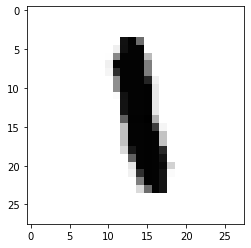

In [18]:
plt.imshow(X, cmap='Greys') # 顯示圖檔

## 2.3 輸出格式整理
和上次一樣, 我們用標準 1-hot 方式處理

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 3. 打造你的 CNN
## 3.1 決定神經網路架構、讀入相關套件
CNN我們一樣要決定用幾層的CNN,然後是不是每次都要做 max-pooling。再來就是拉平、送入標準神經網路(再度要決定幾層、幾個神經元)。

做3次 convolution ,filter大小都是 3x3

每次都接 max-pooling, 都用 2x2 為一小區塊

CNN 一個小技巧是每層的 filters 數目是越來越多。做完 convolution 之後, 我們要拉平、再送入一個標準的神經網路。

這個神經網路設計是這樣:只有 1 個隱藏層, 使用 200 個神經元。

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten  # Flatten用於將矩陣拉成向量
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

## 3.2 建構我們的神經網路
一開始一樣是打開個空白的神經網路。

In [14]:
model = Sequential()

In [15]:
# 第一次
model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1)))   # padding='same'用於將輸出的大小一樣是用28*28，不要改變大小
model.add(Activation('relu'))

# 另一種寫法：model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
# 第二次
model.add(Conv2D(64, (3,3), padding='same'))   # CNN的 filter一般來說會越來越多
model.add(Activation('relu'))

# 另一種寫法：model.add(Conv2D(64,(3,3), padding='same', activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
# 第三次
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))

# 另一種寫法：model.add(Conv2D(128,(3,3), padding='same', activation='relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
# 拉平
model.add(Flatten())

In [22]:
# 一個標準的神經網路
model.add(Dense(200))
model.add(Activation('relu'))

# 另一種寫法：model.add(Dense(200, activation='relu'))

In [23]:
# 輸出層
model.add(Dense(10))
model.add(Activation('softmax'))

# 另一種寫法：model.add(Dense(10, activation='relu'))

## 3.3 組裝
和之前比較不一樣的是我們還要做 compile 才正式把我們的神經網路建好。

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

## 3.4 檢視我們的神經網路

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [25]:
# 3*3(filter)*32(神經元的數量)+32(biases)=320
# (3*3*32)*64+64=18496
# (3*3*64)*128+128=73856

# 1152*200+200=230600
# 200*10+10=2010

## 4. 訓練

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=12)




Epoch 1/12





60000/60000 [==============================] - 173s 3ms/step - loss: 0.1274 - acc: 0.3271
Epoch 2/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0079 - acc: 0.9483
Epoch 3/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0045 - acc: 0.9712
Epoch 4/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0033 - acc: 0.9785
Epoch 5/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0028 - acc: 0.9826
Epoch 6/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0023 - acc: 0.9857
Epoch 7/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0020 - acc: 0.9879
Epoch 8/12
60000/60000 [==============================] - 252s 4ms/step - loss: 0.0017 - acc: 0.9895
Epoch 9/12
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0015 - acc: 0.9910
Epoch 10/12
60000/60000 [==============================] - 248s 4ms/step - loss: 0.

## 5. 結果測試
## 5.1 分數

In [27]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 17s 2ms/step


In [28]:
print('loss: ', score[0])
print('acc: ', score[1])

loss:  0.0019628237403235085
acc:  0.987


## 5.2 欣賞一下成果
我們用另一個方式: 每次選 5 個顯示, 看是不是有正確辨識。

In [29]:
predict = model.predict_classes(x_test)

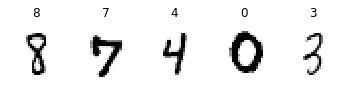

In [30]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")

## 5.3 儲存結果
結果看來還不差, 所以我們把結果存起來。

In [31]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

## 5.4 小結論
我們到此, 基本上是「亂做」的神經網路。有些同學在不斷試驗的過程中, 可能會發現有時會出現很糟糕的結果。因此, 接下來我們要介紹怎麼樣用些簡單的手法, 能讓學習效果比較穩定, 而且有可能可以增加學習效率。

## 5.5 取回訓練好的神經網路

In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 1. 找回我們的神經網路

In [97]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [98]:
from keras.models import model_from_json
from keras.optimizers import SGD

In [99]:
# 讀取神經網路架構與權重

model = model_from_json(open('handwriting_model_cnn.json').read())
model.load_weights('handwriting_weights_cnn.h5')

In [100]:
# 組裝
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

## 2. 資料再讀回來

In [101]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
x_train = x_train.reshape(60000, 28, 28, 1) 
x_test = x_test.reshape(10000, 28, 28, 1)

## 3. 找一個來試試

In [103]:
# n_test = 1234
n_test=9487

In [104]:
x = x_test[n_test]

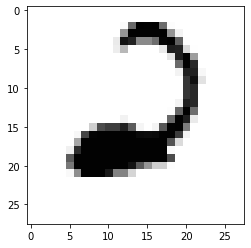

In [107]:
plt.imshow(x.reshape(28,28), cmap='Greys')

In [109]:
model.predict_classes(x.reshape(1, 28,28,1)) 

array([2], dtype=int64)